In [53]:
import pandas as pd 
import numpy as np

In [54]:
data = pd.read_csv('C:Downloads/best_salesman_homework.csv')

## EDA

In [55]:
data.head()

,client_account_id,date,event_name,manager_id,manager_nickname
0,0,2022-05-09,first_touch,1.0,Justin Beiber
1,1,2022-03-21,first_touch,3.0,Joe Biden
2,2,2022-04-18,first_touch,2.0,Kylie Jenner
3,3,2022-02-07,first_touch,2.0,Kylie Jenner
4,4,2022-04-08,first_touch,1.0,Justin Beiber


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_account_id  3183 non-null   int64  
 1   date               3183 non-null   object 
 2   event_name         3183 non-null   object 
 3   manager_id         3183 non-null   float64
 4   manager_nickname   3183 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 124.5+ KB


In [57]:
data.describe()

,client_account_id,manager_id
count,3183.000000,3183.000000
mean,1494.974552,2.101162
std,861.116990,0.820737
min,0.000000,1.000000
25%,753.500000,1.000000
50%,1492.000000,2.000000
75%,2245.500000,3.000000
max,2986.000000,3.000000


In [58]:
data['event_name'].value_counts()

first_touch    2987
deal            196
Name: event_name, dtype: int64

In [59]:
data['manager_nickname'].value_counts()

Joe Biden        1249
Kylie Jenner     1007
Justin Beiber     927
Name: manager_nickname, dtype: int64

In [60]:
data['manager_id'].value_counts()

3.0    1249
2.0    1007
1.0     927
Name: manager_id, dtype: int64

In [61]:
data.duplicated().sum()

0

## Data processing

In [62]:
data['date']  = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['manager_id'] = data['manager_id'].astype('int')

In [63]:
data = data.set_index('date')

In [64]:
data.index.is_monotonic

False

In [65]:
data.sort_index(inplace=True)
data.index.is_monotonic

True

In [66]:
data['manager_id'].value_counts()

3    1249
2    1007
1     927
Name: manager_id, dtype: int64

In [67]:
data = data.reset_index()

In [68]:
data.head()

,date,client_account_id,event_name,manager_id,manager_nickname
0,2021-05-16,1557,first_touch,3,Joe Biden
1,2021-05-16,659,first_touch,3,Joe Biden
2,2021-05-16,2560,first_touch,3,Joe Biden
3,2021-05-16,1567,first_touch,3,Joe Biden
4,2021-05-17,2982,first_touch,3,Joe Biden


In [69]:
# mng_1_deal = data_mng_1[data_mng_1['event_name']=='deal']
# mng_1_touch = data_mng_1[data_mng_1['event_name']=='first_touch']
deal_id = list(data[data['event_name']=='deal']['client_account_id'])
touch_id = list(data[data['event_name']=='first_touch']['client_account_id'])

In [70]:
len(data) 

3183

In [71]:
touch_deal_id =[]
for i in deal_id:
    if i in touch_id:
        touch_deal_id.append(i)
a = data[np.isin(data, touch_deal_id).any(axis=1)]
a = a.reset_index(drop=True)
a["hl"] = np.nan
a.head()

,date,client_account_id,event_name,manager_id,manager_nickname,hl
0,2021-05-16,659,first_touch,3,Joe Biden,NaN
1,2021-05-23,1617,first_touch,3,Joe Biden,NaN
2,2021-06-01,1358,first_touch,3,Joe Biden,NaN
3,2021-06-02,1965,first_touch,3,Joe Biden,NaN
4,2021-06-06,781,first_touch,3,Joe Biden,NaN


In [72]:
a = a.sort_values(['client_account_id', 'date']).reset_index(drop=True)

In [73]:
a.head()

,date,client_account_id,event_name,manager_id,manager_nickname,hl
0,2022-02-24,40,deal,3,Joe Biden,NaN
1,2022-05-02,40,first_touch,1,Justin Beiber,NaN
2,2022-02-03,63,first_touch,1,Justin Beiber,NaN
3,2022-03-14,63,deal,2,Kylie Jenner,NaN
4,2021-12-17,86,first_touch,3,Joe Biden,NaN


In [74]:
a_ft = a[a['event_name']=='first_touch']
a_dl = a[a['event_name']=='deal']

In [75]:
a_dl = a_dl.reset_index(drop=True) 

In [76]:
a_ft = a_ft.reset_index(drop=True) 

In [77]:
data_new = pd.DataFrame(columns=a_ft.columns)

In [103]:
for i in range(len(a_dl)):
    data_new=data_new.append(a_ft.loc[i])
    data_new=data_new.append(a_dl.loc[i])

In [79]:
data_new = data_new.reset_index(drop=True)

In [80]:
data_new.append(a_ft.loc[0]).head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6764\2000018525.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_new.append(a_ft.loc[0]).head()


,date,client_account_id,event_name,manager_id,manager_nickname,hl
0,2022-05-02 00:00:00,40,first_touch,1,Justin Beiber,NaN
1,2022-02-24 00:00:00,40,deal,3,Joe Biden,NaN
2,2022-02-03 00:00:00,63,first_touch,1,Justin Beiber,NaN
3,2022-03-14 00:00:00,63,deal,2,Kylie Jenner,NaN
4,2021-12-17 00:00:00,86,first_touch,3,Joe Biden,NaN


In [81]:
data_new['event_name'][0]

'first_touch'

In [82]:
for i in range(len(data_new)):
    if data_new['event_name'][i]=='deal':
        data_new['hl'][i] = data_new['date'][i]-data_new['date'][i-1]

In [83]:
data_new.head()

,date,client_account_id,event_name,manager_id,manager_nickname,hl
0,2022-05-02 00:00:00,40,first_touch,1,Justin Beiber,NaN
1,2022-02-24 00:00:00,40,deal,3,Joe Biden,-67 days +00:00:00
2,2022-02-03 00:00:00,63,first_touch,1,Justin Beiber,NaN
3,2022-03-14 00:00:00,63,deal,2,Kylie Jenner,39 days 00:00:00
4,2021-12-17 00:00:00,86,first_touch,3,Joe Biden,NaN


In [84]:
a = data_new.dropna()

In [85]:
a['hl'] = a['hl'].astype('str')
a['hl'] = a['hl'].apply(lambda x: int(x.split()[0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_6764\201143033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['hl'] = a['hl'].astype('str')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6764\201143033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['hl'] = a['hl'].apply(lambda x: int(x.split()[0]))


<AxesSubplot:>

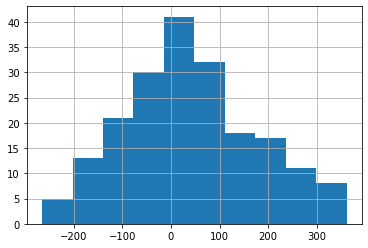

In [86]:
a['hl'].hist()

In [87]:
#a = a[a['hl']>0]

In [88]:
a.head()

,date,client_account_id,event_name,manager_id,manager_nickname,hl
1,2022-02-24 00:00:00,40,deal,3,Joe Biden,-67
3,2022-03-14 00:00:00,63,deal,2,Kylie Jenner,39
5,2022-05-24 00:00:00,86,deal,1,Justin Beiber,158
7,2022-05-23 00:00:00,87,deal,2,Kylie Jenner,-7
9,2021-08-30 00:00:00,127,deal,3,Joe Biden,-265


In [89]:
a['hl'].abs().mean() 

109.46938775510205

In [90]:
from datetime import datetime, timedelta
d = data['date'][-1:] - timedelta(days=round(a['hl'].abs().mean()))

In [91]:
d

3182   2022-02-14
Name: date, dtype: datetime64[ns]

In [92]:
deal = data[data['event_name']!='first_touch']

In [93]:
deal = deal[deal['date']>=d[3182]]

In [94]:
deal.head() 

,date,client_account_id,event_name,manager_id,manager_nickname
1735,2022-02-18,2603,deal,3,Joe Biden
1737,2022-02-18,2237,deal,2,Kylie Jenner
1788,2022-02-22,145,deal,3,Joe Biden
1793,2022-02-23,1329,deal,3,Joe Biden
1811,2022-02-24,1044,deal,2,Kylie Jenner


In [95]:
data_new = data_new[data_new['date']<d[3182]]

In [96]:
frames = [data_new, deal]

result = pd.concat(frames)

In [97]:
result.head()

,date,client_account_id,event_name,manager_id,manager_nickname,hl
2,2022-02-03 00:00:00,63,first_touch,1,Justin Beiber,NaN
4,2021-12-17 00:00:00,86,first_touch,3,Joe Biden,NaN
9,2021-08-30 00:00:00,127,deal,3,Joe Biden,-265 days +00:00:00
11,2022-02-10 00:00:00,134,deal,3,Joe Biden,-58 days +00:00:00
12,2021-10-29 00:00:00,135,first_touch,3,Joe Biden,NaN


In [98]:
result = result.sort_values('client_account_id').reset_index(drop=True)

In [99]:
def conversion(result, mng_id):
    mng_1_data = result[result['manager_id']==mng_id]
    mng_1_deal_id = list(mng_1_data[mng_1_data['event_name']=='deal']['client_account_id'])
    mng_1_touch_id = list(mng_1_data[mng_1_data['event_name']=='first_touch']['client_account_id'])
    mng_1_touch_deal_id =[]
    for i in mng_1_deal_id:
        if i in mng_1_touch_id:
            mng_1_touch_deal_id.append(i)
    import numpy as np
    a = data[np.isin(data, mng_1_touch_deal_id).any(axis=1)]
    a = a.reset_index(drop=True)
    return len(mng_1_touch_deal_id)/len(mng_1_data)*100, a['manager_nickname'][0]

In [100]:
conversion(result, 1)

(2.2222222222222223, 'Justin Beiber')

In [101]:
conversion(result, 2)

(10.679611650485436, 'Kylie Jenner')

In [102]:
conversion(result, 3)

(17.763157894736842, 'Joe Biden')